# Welcome to WOA7015 Advance Machine Learning Lab - Week 4
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


## 1.0 Effect of weight and bias to sigmoid function
This is the code to generate the figure in slide 6

#### 1.1 Effect of weight on sigmoid function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# create sigmoid function
f = lambda x, w, b: 1/(1 + np.exp(-(w*x + b)))

x = np.arange(-10, 10, 0.01).reshape([-1, 1])

# effect of weight on sigmoid function
filenames = []
for i in np.arange(1, 5, 0.1):
  w = np.ones([1, 1]) * i * 0.5
  b = np.ones([1, 1]) * 0

  plt.plot(x, f(x, w, b))
  plt.title('w = %0.1f' % i)
  plt.grid()
  plt.savefig('w %0.1f.png' % i)
  plt.close()
  filenames.append('w %0.1f.png' % i)

# Build GIF
with imageio.get_writer('w_mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)



#### 1.1 Effect of bias on sigmoid function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# create sigmoid function
f = lambda x, w, b: 1/(1 + np.exp(-(w*x + b)))

x = np.arange(-10, 10, 0.01).reshape([-1, 1])

# effect of bias on sigmoid function
filenames = []
for i in np.arange(1, 5, 0.1):
  w = np.ones([1, 1])
  b = np.ones([1, 1])* i

  plt.plot(x, f(x, w, b))
  plt.title('b = %0.1f' % i)
  plt.grid()
  plt.savefig('b %0.1f.png' % i)
  plt.close()
  filenames.append('b %0.1f.png' % i)

# Build GIF
with imageio.get_writer('b_mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


# 2.0 Logistic Regression

In this section, we will learn how to create train a Logistic Regression Model using pytorch. We will use MNIST image, as shown below. <br><br>

PyTorch (https://pytorch.org/) is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. 


<br>
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week4/MnistExamples.png" width="512"/>




In [ ]:
# 2.1 import library
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np


In [ ]:
#2.2 Set the Hyper-parameters 
input_size = 28 * 28  # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [ ]:
#2.3 Data loader
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()
----------------
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: ToTensor()

training data shape:  torch.Size([60000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, 'n = 43926 label = 7')

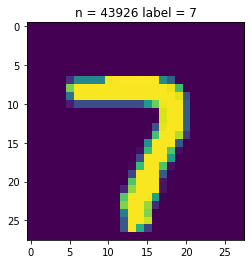

In [ ]:
# 2.3.1 Check data 
print(train_dataset)
print('----------------')
print(test_dataset)
print()

import matplotlib.pyplot as plt
print('training data shape: ', train_dataset.data.shape)
n = np.random.randint(0, 60000)
plt.imshow(train_dataset.data[n])
plt.title(f'n = %d label = %d' % (n, train_dataset.train_labels[n].numpy()))


In [ ]:
#2.4 Logistic regression model
model = nn.Linear(input_size, num_classes)


In [ ]:
#2.5 Cross Entropy Loss 
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()   


In [ ]:
#2.6 Optimizer Stochastic Gradient Descent 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [ ]:
#2.7 Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2127
Epoch [1/5], Step [200/600], Loss: 2.0888
Epoch [1/5], Step [300/600], Loss: 2.0256
Epoch [1/5], Step [400/600], Loss: 1.9361
Epoch [1/5], Step [500/600], Loss: 1.8750
Epoch [1/5], Step [600/600], Loss: 1.8121
Epoch [2/5], Step [100/600], Loss: 1.7192
Epoch [2/5], Step [200/600], Loss: 1.6593
Epoch [2/5], Step [300/600], Loss: 1.6407
Epoch [2/5], Step [400/600], Loss: 1.6038
Epoch [2/5], Step [500/600], Loss: 1.5125
Epoch [2/5], Step [600/600], Loss: 1.4656
Epoch [3/5], Step [100/600], Loss: 1.5172
Epoch [3/5], Step [200/600], Loss: 1.3261
Epoch [3/5], Step [300/600], Loss: 1.3029
Epoch [3/5], Step [400/600], Loss: 1.3989
Epoch [3/5], Step [500/600], Loss: 1.2512
Epoch [3/5], Step [600/600], Loss: 1.1938
Epoch [4/5], Step [100/600], Loss: 1.2319
Epoch [4/5], Step [200/600], Loss: 1.2853
Epoch [4/5], Step [300/600], Loss: 1.1401
Epoch [4/5], Step [400/600], Loss: 1.1226
Epoch [4/5], Step [500/600], Loss: 1.1503
Epoch [4/5], Step [600/600], Loss:

In [ ]:
#2.8 Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the model on the 10000 test images: 82.66999816894531 %


In [ ]:
#2.9 Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## Exercise 1 (10%): Create custom loss function
In this section, you will need to create our own Cross Entropy loss function and compare with Pytorch's Cross Entropy loss. The objective of this exercise is to enable you to design your own loss function in the future. 

Follow the steps below:
1. Import libraries 
2. Set hyperparameter
3. Data loader 
4. Initialize Logistic Regression 
5. Create custom_CrossEntropyLoss class - copy the following code. Your task is to ***code the log_softmax equation in the log_softmax function.*** 

```
#  Custom Loss - Cross Entropy Loss
class custom_CrossEntropyLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(custom_CrossEntropyLoss, self).__init__()
 
    def forward(self, inputs, targets, smooth=1):      
        num_examples = targets.shape[0]
        batch_size = inputs.shape[0]
        softmax_outputs = self.log_softmax(inputs)
        outputs = softmax_outputs[range(batch_size), targets]        
        return -torch.sum(outputs)/num_examples

    @staticmethod
    def log_softmax(x):
      return ### put the log_softmax function here ### 
```

6. Initialize custom_CrossEntropyLoss loss as criterion - copy section 2.5. Replace *nn.CrossEntropyLoss* with *custom_CrossEntropyLoss*
7. Train the model, evaluate it on your testing data. Save your model. 
8. Compare the loss computed from torch and our custom loss.  


 5% will be  given if step 1 - 4 are done correctly <br>
 3% will be  given if step 5-7 is done correctly <br>
 2% will be given if your custom loss and pytorch loss is near zero. 

In [ ]:
# Step 1 import library
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
# Step 2 Set the hyperparameters
input_size = 28 * 28  
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
# Step 3 Data loader
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f9ea856ee90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9ea81e16d0>)

In [ ]:
# Step 4 Initialize Logistic Regression
model = nn.Linear(input_size, num_classes)
model

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
# Step 5 Create custom_CrossEntropyLoss class
class custom_CrossEntropyLoss1(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(custom_CrossEntropyLoss1, self).__init__()

    def forward(self, inputs, targets, smooth=1):      
        num_examples = targets.shape[0]
        batch_size = inputs.shape[0]
        softmax_outputs = self.log_softmax(inputs)
        outputs = softmax_outputs[range(batch_size), targets]        
        return -torch.sum(outputs)/num_examples

    @staticmethod
    def log_softmax(x):
      return torch.log(torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True))

$log(softmax(x))= log({x_j\over{\sum^n_{i=1}}exp(x_j)})$

In [ ]:
# Step 6 Initialize custom_CrossEntropyLoss loss as criterion
criterion1 = custom_CrossEntropyLoss1()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
criterion1, optimizer

(custom_CrossEntropyLoss1(), SGD (
 Parameter Group 0
     dampening: 0
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
# Step 7 Train the model, evaluate it on the testing data and save the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion1(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2065
Epoch [1/5], Step [200/600], Loss: 2.1111
Epoch [1/5], Step [300/600], Loss: 2.0517
Epoch [1/5], Step [400/600], Loss: 1.9579
Epoch [1/5], Step [500/600], Loss: 1.8812
Epoch [1/5], Step [600/600], Loss: 1.7747
Epoch [2/5], Step [100/600], Loss: 1.7406
Epoch [2/5], Step [200/600], Loss: 1.6943
Epoch [2/5], Step [300/600], Loss: 1.6233
Epoch [2/5], Step [400/600], Loss: 1.5653
Epoch [2/5], Step [500/600], Loss: 1.6057
Epoch [2/5], Step [600/600], Loss: 1.5092
Epoch [3/5], Step [100/600], Loss: 1.4459
Epoch [3/5], Step [200/600], Loss: 1.4133
Epoch [3/5], Step [300/600], Loss: 1.3286
Epoch [3/5], Step [400/600], Loss: 1.2930
Epoch [3/5], Step [500/600], Loss: 1.2208
Epoch [3/5], Step [600/600], Loss: 1.2834
Epoch [4/5], Step [100/600], Loss: 1.2069
Epoch [4/5], Step [200/600], Loss: 1.1171
Epoch [4/5], Step [300/600], Loss: 1.1621
Epoch [4/5], Step [400/600], Loss: 1.1527
Epoch [4/5], Step [500/600], Loss: 1.0997
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 82.62000274658203 %


In [ ]:
# Save the model
torch.save(model.state_dict(), 'model1.ckpt') 

In [ ]:
# Step 8 Compare the loss computed from torch and the custom loss
class custom_CrossEntropyLoss2(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(custom_CrossEntropyLoss2, self).__init__()

    def forward(self, inputs, targets, smooth=1):      
        num_examples = targets.shape[0]
        batch_size = inputs.shape[0]
        # log_softmax from torch
        softmax_outputs = nn.functional.log_softmax(inputs, dim=-1)
        outputs = softmax_outputs[range(batch_size), targets]        
        return -torch.sum(outputs)/num_examples


In [ ]:
# Initialize custom_CrossEntropyLoss loss as criterion
criterion2 = custom_CrossEntropyLoss2()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
criterion2, optimizer

(custom_CrossEntropyLoss2(), SGD (
 Parameter Group 0
     dampening: 0
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
# Train the model, evaluate it on the testing data and save the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion2(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2157
Epoch [1/5], Step [200/600], Loss: 2.1277
Epoch [1/5], Step [300/600], Loss: 2.0220
Epoch [1/5], Step [400/600], Loss: 1.9589
Epoch [1/5], Step [500/600], Loss: 1.8541
Epoch [1/5], Step [600/600], Loss: 1.8078
Epoch [2/5], Step [100/600], Loss: 1.7048
Epoch [2/5], Step [200/600], Loss: 1.7018
Epoch [2/5], Step [300/600], Loss: 1.5761
Epoch [2/5], Step [400/600], Loss: 1.5658
Epoch [2/5], Step [500/600], Loss: 1.5058
Epoch [2/5], Step [600/600], Loss: 1.3957
Epoch [3/5], Step [100/600], Loss: 1.4469
Epoch [3/5], Step [200/600], Loss: 1.3921
Epoch [3/5], Step [300/600], Loss: 1.3843
Epoch [3/5], Step [400/600], Loss: 1.2880
Epoch [3/5], Step [500/600], Loss: 1.2841
Epoch [3/5], Step [600/600], Loss: 1.2794
Epoch [4/5], Step [100/600], Loss: 1.3404
Epoch [4/5], Step [200/600], Loss: 1.1709
Epoch [4/5], Step [300/600], Loss: 1.1883
Epoch [4/5], Step [400/600], Loss: 1.1779
Epoch [4/5], Step [500/600], Loss: 1.1062
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 82.41999816894531 %


In [ ]:
# Save the model
torch.save(model.state_dict(), 'model2.ckpt') 

Comparing the log_softmax from custom definition and the internal log_softmax from torch, it can be seen that both yield almost same accuracy 82% and loss of around 1.0 which is expected given the same mathematical definition. 

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 